In [1]:
#load dragonn tutorial utilities 
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from numpy.random import seed
seed(1234)
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

/users/annashch/miniconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/users/annashch/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## HBA2 

### FC Layer embeddings

In [3]:
uncorrected_fc=np.load("HBA2_FC_layer_NN_embeddings.npz",allow_pickle=True)
corrected_fc=np.load("HBA2_FC_layer_NN_embeddings.gc.npz",allow_pickle=True)
gc_content=open("../compute_gc/gc.HBA2.bed",'r').read().strip().split('\n')
gc_vals=[float(i.split('\t')[-1]) for i in gc_content]


In [4]:
uncorrected_fc_embeddings=uncorrected_fc['embeddings']
uncorrected_fc_bed_entries=uncorrected_fc['bed_entries']
corrected_fc_embeddings=corrected_fc['embeddings']
corrected_fc_bed_entries=corrected_fc['bed_entries']

In [5]:
uncorrected_fc_embeddings_2d = umap.UMAP(random_state=42).fit_transform(uncorrected_fc_embeddings)
corrected_fc_embeddings_2d = umap.UMAP(random_state=42).fit_transform(corrected_fc_embeddings)


In [6]:
import matplotlib.pyplot as plt

In [9]:
uncorrected_fc_embeddings_2d.shape

(4652, 2)

In [13]:
from plotnine import *
import pandas as pd 
hba_df_fc=pd.DataFrame.from_dict({'uncorrected_fc_1':uncorrected_fc_embeddings_2d[:,0],
                              'uncorrected_fc_2':uncorrected_fc_embeddings_2d[:,1],
                              'corrected_fc_1':corrected_fc_embeddings_2d[:,0],
                              'corrected_fc_2':corrected_fc_embeddings_2d[:,1],
                              'gc':gc_vals})


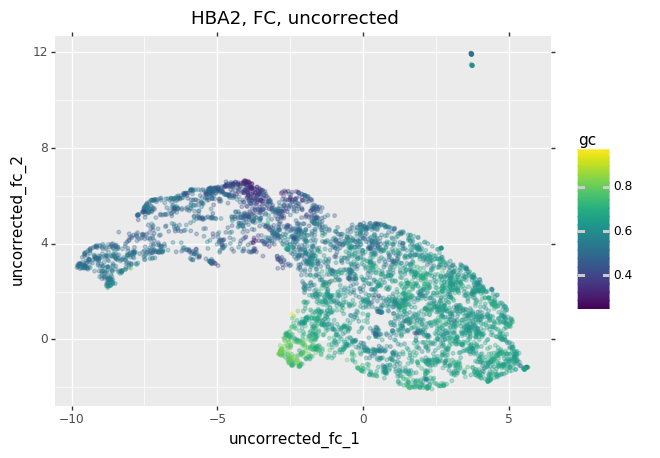

<ggplot: (-9223363261174667092)>

In [20]:
(ggplot(hba_df,aes(x='uncorrected_fc_1', y='uncorrected_fc_2',color='gc'))+
 geom_point(size=1,alpha=0.3)+
 ggtitle("HBA2, FC, uncorrected"))


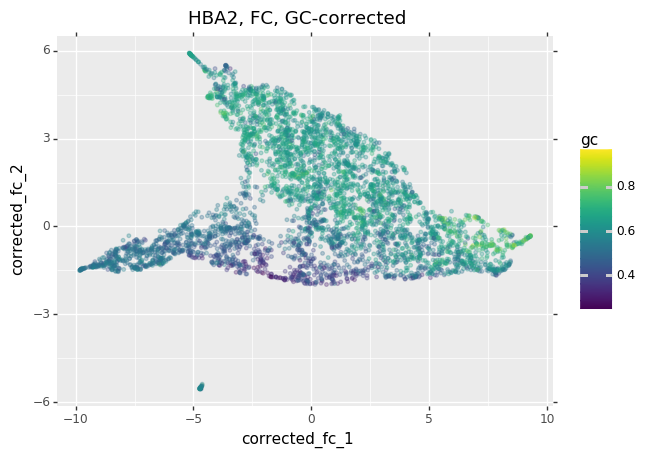

<ggplot: (8775681805674)>

In [21]:
(ggplot(hba_df,aes(x='corrected_fc_1', y='corrected_fc_2',color='gc'))+
 geom_point(size=1,alpha=0.3)+
 ggtitle("HBA2, FC, GC-corrected"))


### Conv 1 layer embeddings 

In [25]:
uncorrected_conv1=np.load("HBA2_CONV1_layer_NN_embeddings.npz",allow_pickle=True)
corrected_conv1=np.load("HBA2_CONV1_layer_NN_embeddings.gc.npz",allow_pickle=True)
uncorrected_conv1_embeddings=uncorrected_conv1['embeddings']
uncorrected_conv1_bed_entries=uncorrected_conv1['bed_entries']
corrected_conv1_embeddings=corrected_conv1['embeddings']
corrected_conv1_bed_entries=corrected_conv1['bed_entries']
uncorrected_conv1_embeddings_2d = umap.UMAP(random_state=42).fit_transform(uncorrected_conv1_embeddings)
corrected_conv1_embeddings_2d = umap.UMAP(random_state=42).fit_transform(corrected_conv1_embeddings)
hba_df_conv1=pd.DataFrame.from_dict({'uncorrected_conv1_1':uncorrected_conv1_embeddings_2d[:,0],
                              'uncorrected_conv1_2':uncorrected_conv1_embeddings_2d[:,1],
                              'corrected_conv1_1':corrected_conv1_embeddings_2d[:,0],
                              'corrected_conv1_2':corrected_conv1_embeddings_2d[:,1],
                              'gc':gc_vals})


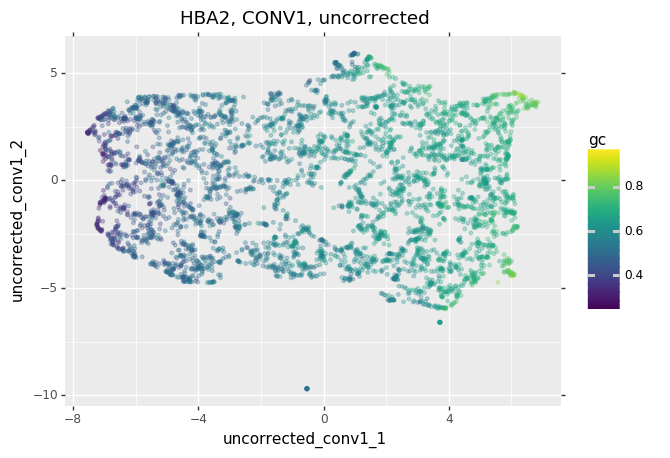

<ggplot: (8775680069717)>

In [26]:
(ggplot(hba_df_conv1,aes(x='uncorrected_conv1_1', y='uncorrected_conv1_2',color='gc'))+
 geom_point(size=1,alpha=0.3)+
 ggtitle("HBA2, CONV1, uncorrected"))


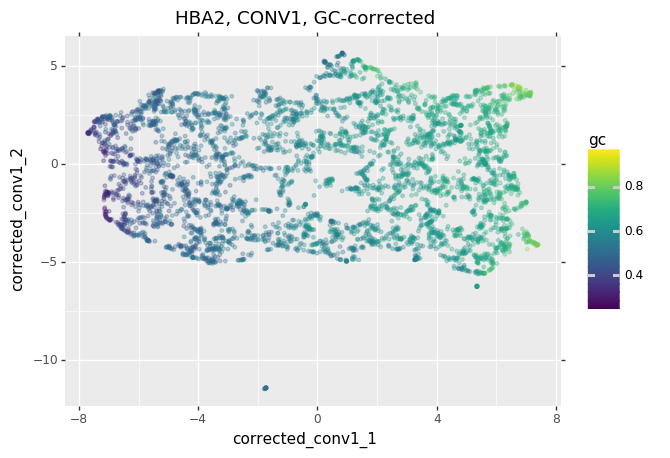

<ggplot: (-9223363261175107107)>

In [27]:
(ggplot(hba_df_conv1,aes(x='corrected_conv1_1', y='corrected_conv1_2',color='gc'))+
 geom_point(size=1,alpha=0.3)+
 ggtitle("HBA2, CONV1, GC-corrected"))